In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from enum import Enum
import seaborn as sb
%matplotlib inline

df = pd.read_csv('ums_viz.csv')
df_perf = pd.read_pickle('descriptions.pkl')
df_perf.columns.values[0] = 'perf_name'

df['perf_name'] = df['perf_name'].apply(lambda x: x.strip())
df_perf['perf_name'] = df_perf['perf_name'].apply(lambda x: x.strip())

df['per_seat'] = df['tck_amt']/df['num_seats']
df_group = df.groupby('perf_name')

# Add a whole bunch of new performance-level features

# mean ticket amount, number of seats, price per seat
df_tmp = df_group['tck_amt', 'num_seats', 'per_seat'].mean().reset_index()
df_tmp = df_tmp.rename(columns = {'tck_amt': 'mean_tck_amt', 'num_seats': 'mean_num_seats', 'per_seat': 'mean_per_seat'})

df_perf = pd.merge(df_perf, df_tmp, on='perf_name')

# max ticket amount, number of seats, price per seat
df_tmp = df_group['tck_amt', 'num_seats', 'per_seat'].max().reset_index()
df_tmp = df_tmp.rename(columns = {'tck_amt': 'max_tck_amt', 'num_seats': 'max_num_seats', 'per_seat': 'max_per_seat'})
df_perf = pd.merge(df_perf, df_tmp, on='perf_name')

# total number of seats
df_tmp = df_group['num_seats'].count().reset_index()
df_tmp = df_tmp.rename(columns = {'num_seats': 'count_tck_amt'})
df_perf = pd.merge(df_perf, df_tmp, on='perf_name')

In [84]:
class Topic(Enum):
    Chamber = 0
    Choral = 1
    Dance = 2
    Jazz = 3
    Other = 4
def label_to_enum(label):
    if label == 'Chamber':
        return Topic.Chamber
    if label == 'Choral':
        return Topic.Choral
    if label == 'Dance':
        return Topic.Dance
    if label == 'Jazz':
        return Topic.Jazz
    if label == 'Other':
        return Topic.Other
#topics from purchasing info
topics = pd.read_csv('Topics.csv', header=-1)
#out of order, sorting before putting in df_perf
in_dict = {}
for t in topics[0]:
    if t == 'Usher party':
        continue
    in_dict[t] = df_perf['perf_name'][df_perf['perf_name'] == t].index[0]
topics_sorted = list(np.arange(143))
for i in range(len(topics[0])):
    name = topics[0].loc[i]
    if name == 'Usher party':
        continue
    topics_sorted[in_dict[name]] = label_to_enum(topics.loc[i][1])
df_perf['topics'] = topics_sorted

In [89]:
df_perf

,perf_name,description,mean_tck_amt,mean_num_seats,mean_per_seat,max_tck_amt,max_num_seats,max_per_seat,count_tck_amt,topics
0,The Infernal Comedy,John Malkovich makes his UMS debut portraying ...,72.092196,1.997354,37.194444,595.0,14,75.0,1512,Topic.Choral
1,"Yuja Wang, piano",Chinese pianist Yuja Wang combines the spontan...,63.171001,2.003096,32.884830,460.0,23,56.0,969,Topic.Choral
2,London Philharmonic,The London Philharmonic returns for its first ...,77.771242,1.937255,40.968301,1000.0,50,80.0,1530,Topic.Choral
3,Hamburg Symphony,"In 1971, French composer Olivier Messiaen was ...",62.176976,1.838933,34.027619,487.5,17,65.0,1012,Topic.Choral
4,Chicago Symphony Orc,Wind players of the Chicago Symphony come toge...,110.584576,1.914630,56.604253,14960.0,187,120.0,3151,Topic.Choral
5,San Francisco Sympho,Michael Tilson Thomas and the San Francisco Sy...,70.300088,1.840749,38.253759,2137.5,47,85.0,4540,Topic.Choral
6,Pavel Haas Quartet,“The world’s most exciting string quartet? Wel...,52.089516,1.725806,29.705914,220.5,7,42.0,372,Topic.Chamber
7,Ballet Preljocaj,Few audience members in attendance at Ballet P...,56.356970,1.902251,28.629358,384.0,14,54.0,2977,Topic.Dance
8,Joshua Bell,"Often referred to as a “poet of the violin,” J...",105.120187,2.039090,52.261669,1000.0,45,100.0,1714,Topic.Choral
9,Murray Perahia,In the more than 35 years he has been performi...,76.766534,1.833067,41.964217,476.0,12,75.0,1252,Topic.Choral


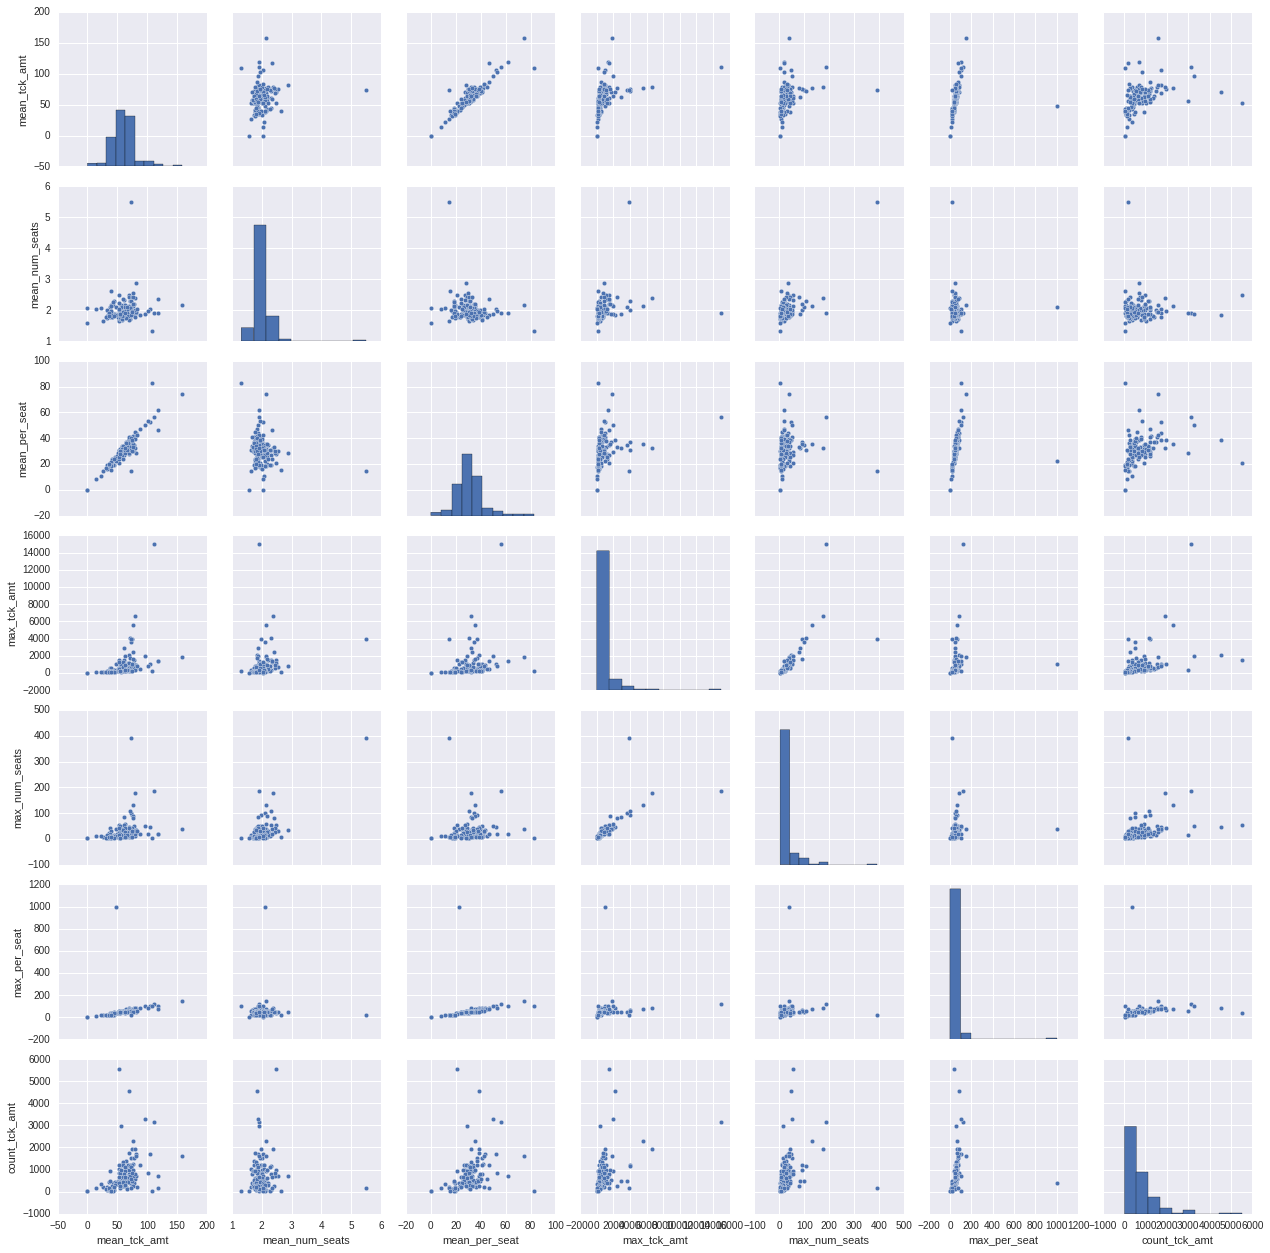

In [85]:
sb.pairplot(df_perf)